In [3]:
import numpy as np
import pandas as pd

In [5]:
train_f = pd.read_csv("./data/features_train/features_resnet1000_train.csv", header=None)
train_f.head(2)

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,images_train/5373.jpg,-0.899450,-0.930470,-2.503365,-3.172499,-2.819133,0.992159,-3.698863,0.619991,0.956148,...,-3.021916,2.214253,-1.382491,1.672911,1.014233,2.599949,2.773284,-2.066632,0.385754,-3.241320
1,images_train/984.jpg,-1.346954,-3.119461,-0.765971,-1.382550,-1.104675,-3.656271,-4.815436,-0.556942,-1.402286,...,0.011003,-3.968805,-2.694711,-4.196480,-2.880234,-1.210742,-1.605143,-4.859987,-0.837670,-0.967604


In [6]:
test_f = pd.read_csv("./data/features_test/features_resnet1000_test.csv", header=None)
# test_f.head(2)

In [7]:
train_size = 10000
v_len = 1000
test_size = 2000

In [8]:
Y_train_tmp = train_f.as_matrix()
Y_test_tmp = test_f.as_matrix()
Y_train = np.zeros((train_size, v_len))
Y_test = np.zeros((test_size, v_len))

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [9]:
# "images_train/5373.jpg"
for vector in Y_train_tmp:
    img = int(vector[0].split('/')[1].split('.')[0])
    Y_train[img] = vector[1:]
Y_train.shape

(10000, 1000)

In [10]:
for vector in Y_test_tmp:
    img = int(vector[0].split('/')[1].split('.')[0])
    Y_test[img] = vector[1:]
Y_test.shape

(2000, 1000)

In [15]:
import re
import nltk
# nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

train_dict_inclusive = {}
def create_dict(path, size):    
    for i in range(size):
        print "here is ", i
        fname = path+str(i)+".txt"
        with open(fname, "r") as f:
            text = f.read()
            print text if i == 20 else None
            text = np.char.lower(text)
            print text if i == 20 else None
            text = re.sub('[^\w\s]', ' ', str(text))
            print text if i == 20 else None
            stemmer = PorterStemmer()
            for word in text.split():
                if word not in stopwords.words("english"):
                    w = stemmer.stem(word)
                    if w in train_dict_inclusive:
                        train_dict_inclusive[w] += 1
                    else:
                        train_dict_inclusive[w] = 1
create_dict("./data/descriptions_train/", 50)    
print train_dict_inclusive

here is  0
None
None
here is  1
None
None
here is  2
None
None
here is  3
None
None
here is  4
None
None
here is  5
None
None
here is  6
None
None
here is  7
None
None
here is  8
None
None
here is  9
None
None
here is  10
None
None
here is  11
None
None
here is  12
None
None
here is  13
None
None
here is  14
None
None
here is  15
None
None
here is  16
None
None
here is  17
None
None
here is  18
None
None
here is  19
None
None
here is  20
A cat sitting in front of a large computer monitor.
A kitten is trying to interact with a kitten that is on television.
A cat curiously looks at a photo of a cat on a computer screen
A cat looking at another cat on the television.
A cat sitting in front of a monitor that is displaying a picture of another cat.

a cat sitting in front of a large computer monitor.
a kitten is trying to interact with a kitten that is on television.
a cat curiously looks at a photo of a cat on a computer screen
a cat looking at another cat on the television.
a cat sitting 

In [9]:
# find how many 1s 2s in the dictionary

In [10]:
train_dict_filterd = {}
def filter_dict(path, size, threshold):
    index = 0
    for w in train_dict_inclusive:
        if train_dict_inclusive[w] > threshold:
            train_dict_filterd[w] = index
            index += 1  
    
    des_vec = {}
    for i in range(size):
        fname = path+str(i)+".txt"
        with open(fname, "r") as f:
            text = f.read()
            text = np.char.lower(text)
            text = re.sub('[^\w\s]', ' ', str(text))
            stemmer = PorterStemmer()
            cur = [0] * len(train_dict_filterd)
            for word in text.split():
                if word not in stopwords.words("english"):
                    w = stemmer.stem(word)
                    if w in train_dict_filterd:
                        cur[train_dict_filterd[w]] += 1
            des_vec[fname.split('/')[-1]] = cur
    return des_vec

thresh = 10
train_des = filter_dict("../data/descriptions_train/", train_size, thresh)
test_des = filter_dict("../data/descriptions_test/", test_size, thresh)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
X = []
test_X = []
y = []
for k in train_des:
    X.append(train_des[k])
    y.append(k)
for m in test_des:
    test_X.append(test_des[m])
X = np.array(X)
test_X = np.array(test_X)
print len(X)
y = np.array(y)
print len(y)
row_sums = X.sum(axis=1)
normed_X = X / row_sums[:, np.newaxis]
knn.fit(normed_X, y)

10000
10000


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [15]:
train_feat_dict = {}
for i  in range(len(Y_train_tmp)):
    name = int(Y_train_tmp[i][0].split("/")[1].split(".")[0])
    train_feat_dict[name] = np.array(Y_train_tmp[i][1:], dtype=float)

def get_arg_feat(name, Y_train_tmp):
    res = train_feat_dict[name]
    return res

In [18]:
def get_score(feat1, feat2):
    feat1 = np.array(feat1, dtype=float)
    feat2 = np.array(feat2, dtype=float)
    return np.linalg.norm(feat1 - feat2)

In [19]:
import operator
def get_20_images(target_feat, feats):
    feat_score = {}
    for f in feats:
        name = f[0,].split("/")[1]
        score = get_score(target_feat, f[1:])
        feat_score[name] = score
    #sorted_feat_score = sorted(feat_score.items(), key=operator.itemgetter(1), reverse=True)
    sorted_feat_score = sorted(feat_score.items(), key=operator.itemgetter(1))
    res = []
    for i in range(20):
        res.append(sorted_feat_score[i][0])
    res = np.array(res)
    return res;

# top_20 = get_20_images(agg, test_feat)

In [20]:

# get feature
train_feat, test_feat = [], []
for line in open("../data/features_train/features_resnet1000_train.csv"):
    l = line.strip().split(",")
    train_feat.append(l)
train_feat = np.array(train_feat)
for line in open("../data/features_test/features_resnet1000_test.csv"):
    l = line.strip().split(",")
    test_feat.append(l)
test_feat = np.array(test_feat)

# des be like "0.txt"
def predict(des):
    d = np.array(test_des[des])
    row_sums = d.sum()
#     normed_d = d / row_sums[:, np.newaxis]
    pred = knn.predict(d.reshape(1, -1))
    pred_int = int(pred[0].split(".")[0])
    agg = get_arg_feat(pred_int, train_feat)
    top_20 = get_20_images(agg, test_feat)
    return top_20

top = predict("1.txt")

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# # Fit regression model
# tree_1 = DecisionTreeRegressor(max_depth=5)
# tree_1.fit(X, Y_train)
# # print (tree_1.predict(test_X).shape)

In [21]:
d = np.array(test_des["0.txt"])

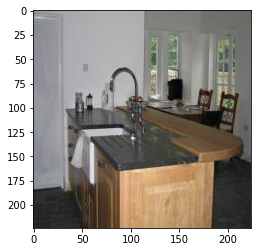

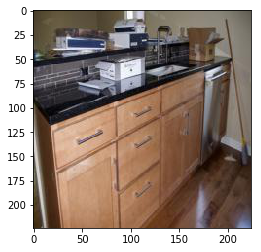

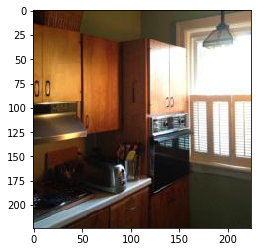

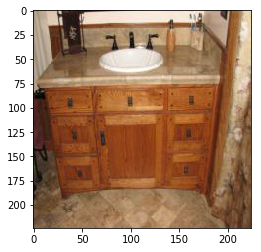

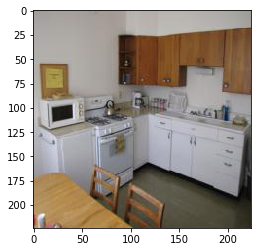

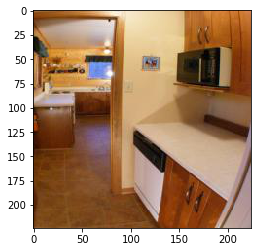

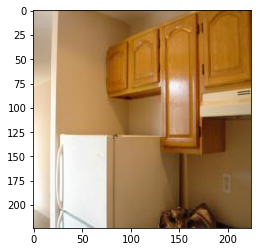

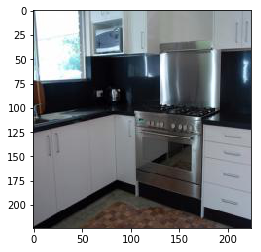

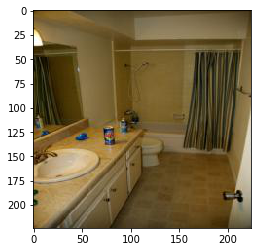

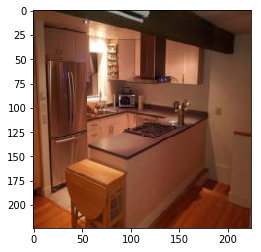

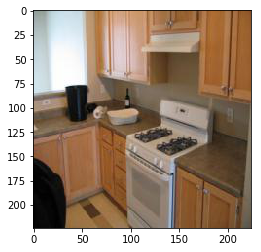

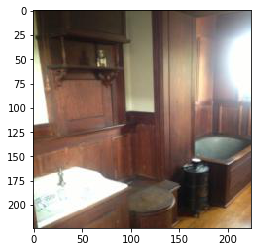

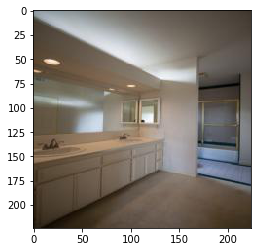

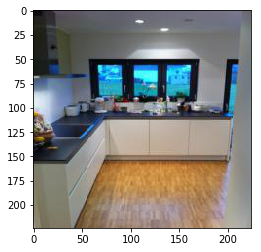

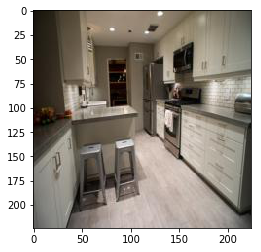

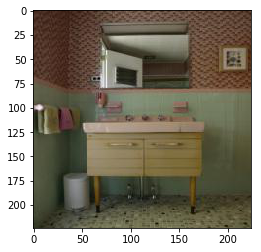

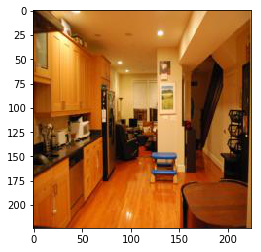

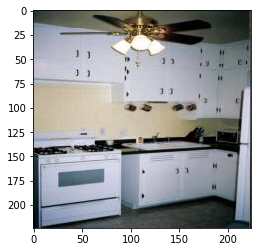

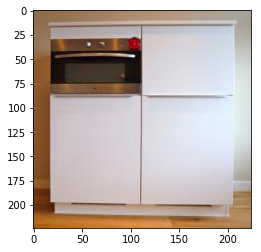

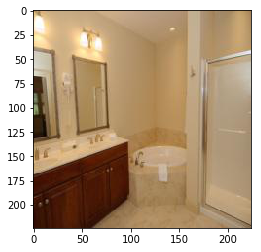

In [23]:
from PIL import Image
import matplotlib.pyplot as plt
def show_20_images(top_20):
    for i in top_20:
        img = Image.open("../data/images_test/" + i)
        img = np.asarray(img)
        plt.imshow(img)
        plt.show()

show_20_images(top)

In [24]:
import csv
import time

submission = []
def kaggle():
    submission = []
    submission.append(["Descritpion_ID", "Top_20_Image_IDs"])
    count = 0
    for d in test_des:
        if count % 50 == 0:
            print(count)
        line = []
        line.append(d)
        top_20 = " ".join(predict(d))
        line.append(top_20)
        submission.append(line)
        count += 1
    with open("pred.csv", "w") as f:
        writer = csv.writer(f)
        writer.writerows(submission)

start_time = time.time()
kaggle()
print("--- %s seconds ---" % (time.time() - start_time))

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
--- 2208.33031511 seconds ---


In [187]:
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier

K = 10
for trainKF, testKF in (cross_validation.KFold(train_size, n_folds=K)):
    Xr_KF = X[trainKF,:]
    Yr_KF = Y_train[trainKF,:]
    Xt_KF = X[testKF,:]
    Yt_KF = Y_train[testKF,:]
    tree = DecisionTreeRegressor(max_depth=50)
    tree.fit(Xr_KF, Yr_KF)
    print('RT Score: %f' % tree.score(Xt_KF, Yt_KF))

IndexError: too many indices for array

In [182]:
from sklearn.metrics.pairwise import pairwise_distances
def rank20(myRegressor, X_test, Y_test, metri = 'euclidean'):
    Y_predict = myRegressor.predict(X_test)
    distanceM = pairwise_distances(Y_predict, Y_test, metric = metri)
    return np.argsort(distanceM, axis = 1)[:,:20]

In [183]:
def render(Y_rank, outName = 'result.csv'):
# Y_rank 2000 * 20
    head = []
    content = []
    for i in range(test_size):
        head.append(str(i)+".txt")
        tmp = ""
        for j in range(20):
            tmp = tmp + str(Y_rank[i, j])+".jpg"
            if j < 19:
                tmp = tmp + " "
        content.append(tmp)
    submission = pd.DataFrame({
            "Descritpion_ID": head,
            "Top_20_Image_IDs": content
        })
    submission.to_csv(outName, index=False)

In [184]:
Y_rank = rank20(tree, test_X, Y_test)
render(Y_rank, 'DTR.csv')

In [149]:
from sklearn.neighbors import KNeighborsClassifier
def kNN(train_x, train_y, test_x):
    clf = KNeighborsClassifier()
    nN = {'n_neighbors': [1, 3, 5, 10, 20]}
    grid = GridSearchCV(clf, nN, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)
    grid.fit(train_x, train_y)

    # print results
    cvRes = grid.cv_results_
    for meanScore, param in zip(cvRes['mean_test_score'], cvRes['param_' + 'n_neighbors']):
        print(param, abs(meanScore))
    print('Best Parameters: ' + grid.best_params_.__str__())  # best score (e.g., lowest MAE)

    fig = plt.figure()
    plt.xticks(nN['n_neighbors'], nN['n_neighbors'])
    plt.plot(cvRes['param_' + 'n_neighbors'].data,
             cvRes['mean_fit_time'] * 1000, 'r.',
             label='training')
    plt.ylim(0, )
    plt.xlabel('n_neighbors')
    plt.ylabel('time in milliseconds')
    # plt.legend(loc='best')
    plt.title('kNN')

    plt.show()
#     fig.savefig('../Figures/kNNReg.png', dpi=fig.dpi)

    y_test_pred = grid.predict(test_x)
    print y_test_pred
#     kaggle.kaggleize(y_test_pred, '../Predictions/kNNReg.csv')

    # returns the classifier with the best parameters
    print grid.best_estimator_.n_neighbors

In [150]:
from sklearn.model_selection import GridSearchCV
d = np.array(test_des["1.txt"])
kNN(normed_X, y, d.reshape(1, -1))

ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.